# Business Case: Delhivery - Feature Engineering

# About Delhivery
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.
The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


# Business problem:
The company wants to understand and process the data coming out of data engineering pipelines:
• Clean, sanitize and manipulate data to get useful features out of raw fields
• Make sense out of the raw data and help the data science team to build forecasting models on it


# Column Profiling:
- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
- - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs      along the way
- - Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field


# Concept Used:
- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers


# Problem Statement
##  Basic data cleaning and exploration:
- Handle missing values in the data.
- Analyze the structure of the data.
- Try merging the rows using the hint mentioned above.
##  Build some features to prepare the data for actual analysis. Extract features from the below fields:
- Destination Name: Split and extract features out of destination. City-place-code (State)
- Source Name: Split and extract features out of destination. City-place-code (State)
- Trip_creation_time: Extract features like month, year and day etc
##  In-depth analysis and feature engineering:
- Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
- Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
- Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
- Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
- Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
- Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
- Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
- Handle the outliers using the IQR method.
- Do one-hot encoding of categorical variables (like route_type)
- Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.


## importing libraries for our purpose

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [2]:
df=pd.read_csv('delhivery_data.csv')
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


## No of Rows and columns in data

In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 144867
Number of columns: 24


## checking datatypes

In [4]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

## checking information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## Description of data

In [6]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144867,2,training,104858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144867,2,FTL,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144867,14817,trip-153811219535896559,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144867,1508,IND000000ACB,23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144867,1481,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Description of categorical values in data

In [8]:
df.describe(include='O').T

,count,unique,top,freq
data,144867,2,training,104858
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144867,2,FTL,99660
trip_uuid,144867,14817,trip-153811219535896559,101
source_center,144867,1508,IND000000ACB,23347
source_name,144574,1498,Gurgaon_Bilaspur_HB (Haryana),23347
destination_center,144867,1481,IND000000ACB,15192
destination_name,144606,1468,Gurgaon_Bilaspur_HB (Haryana),15192
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81


## number of unique values in our data

In [9]:
for i in df.columns:
  print(i,':',df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


In [70]:
for i in df.columns:
  print(i,':',df[i].unique())

data : ['training' 'test']
trip_creation_time : ['2018-09-20T02:35:36.476840000' '2018-09-23T06:42:06.021680000'
 '2018-09-14T15:42:46.437249000' ... '2018-09-22T11:30:41.399439000'
 '2018-09-17T11:35:28.838714000' '2018-09-20T16:24:28.436231000']
route_schedule_uuid : ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e08be79-8a4c-4a91-a514-5350403c0e31'
 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c150996']
route_type : ['Carting' 'FTL']
trip_uuid : ['trip-153741093647649320' 'trip-153768492602129387'
 'trip-153693976643699843' ... 'trip-153761584139918815'
 'trip-153718412883843340' 'trip-153746066843555182']
source_center : ['IND388121AAA' 'IND388620AAB' 'IND421302AAG' ... 'IND361335AAA'
 'IND562132AAC' 'IND639104AAB']
source_name : ['anand_vunagar_dc (gujarat)' 'khambhat_motvddpp_d (gujarat)'

## columns in data

In [11]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

## Shape of data

In [12]:
df.shape

(144867, 24)

## Checking for duplicates

In [13]:
df.duplicated().value_counts()

False    144867
dtype: int64

## checking null values in every column of our data

In [14]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

## Managing null values of the data

In [15]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [16]:
missing_to_df(df)

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
cutoff_factor,0,0.000000
segment_osrm_distance,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
factor,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000


In [17]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165


- From th above we can see null values in source_name,destination_name
- From source_name 20% null values and in destination_name 18% null values

## Managing the null values using imputation

In [18]:
# Highest Freq imputation for some categorical columns.
from sklearn.impute import SimpleImputer
cat_missing = ['source_name', 'destination_name']

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [19]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent


In [20]:
missing_to_df(df)

,Total,Percent
data,0,0.0
trip_creation_time,0,0.0
segment_osrm_distance,0,0.0
segment_osrm_time,0,0.0
segment_actual_time,0,0.0
factor,0,0.0
osrm_distance,0,0.0
osrm_time,0,0.0
actual_time,0,0.0
actual_distance_to_destination,0,0.0


- Using Frequency imputer replace all the null values

## Value count for each columns

In [67]:
for i in df.columns:
 print(i,':',df[i].value_counts())

data : training    104858
test         40009
Name: data, dtype: int64
trip_creation_time : 2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: trip_creation_time, Length: 14817, dtype: int64
route_schedule_uuid : thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:036f372d-28d8-4d19-877c-

## Categorical and numerical data

In [21]:
# catgeorical and numerical columns
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)


In [22]:
cat_cols

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'cutoff_timestamp']

In [23]:
num_cols

['start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

## Categorical columns

In [71]:
df[cat_cols]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55.000000
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55.000000
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57.000000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18.000000
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18.000000
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19.000000


## Numerical columns

In [72]:
df[num_cols]

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,86.0,True,9,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,86.0,True,18,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,86.0,True,27,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,86.0,True,36,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,86.0,False,39,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
144862,427.0,True,45,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,427.0,True,54,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,427.0,True,63,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,427.0,True,72,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


## Converting the object data type into datetime field

In [29]:
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'])

In [30]:
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                  datetime64[ns]
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

## Lowering the string values of the column columns for the better analysis

In [31]:
df['destination_name'] = df['destination_name'].str.lower()
df['source_name'] = df['source_name'].str.lower()

# In-depth analysis and feature engineering:

## Grouping and adding the sub columns in the dataset

In [32]:
df['df_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
df_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time','osrm_time']
for col in df_cols:
    df[col + '_sum'] = df.groupby('df_key')[col].cumsum()  
df[[col + '_sum' for col in df_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,osrm_time_sum
0,14.0,11.9653,11.0,11.0
1,24.0,21.7243,20.0,31.0
2,40.0,32.5395,27.0,59.0
3,61.0,45.5619,39.0,99.0
4,67.0,49.4772,44.0,143.0
...,...,...,...,...
144862,92.0,65.3487,94.0,230.0
144863,118.0,82.7212,115.0,306.0
144864,138.0,103.4265,149.0,394.0
144865,155.0,122.3150,176.0,492.0


## Aggrigating the Dataset with respect to the grouped above data

In [33]:
dict1 = { 
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'max',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',  
}

In [34]:
df1 = df.groupby('df_key').agg(dict1).reset_index()
df1 = df1.sort_values(by=['df_key','od_end_time'], ascending=True).reset_index()

In [35]:
df1

,index,df_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,peikulam_srivnktpm_d (tamil nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,eral_busstand_d (tamil nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,sandur_wrdn1dpp_d (karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


##  Time taken between od_start_time and od_end_time 

In [36]:
df1['od_time_diff_hour'] = (df1['od_end_time'] - df1['od_start_time']).dt.total_seconds() /(60)
df1['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26363      62.115193
26364      91.087797
26365      44.174403
26366     287.474007
26367      66.933565
Name: od_time_diff_hour, Length: 26368, dtype: float64

In [37]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() /(60)
df['od_time_diff_hour']

0          86.213637
1          86.213637
2          86.213637
3          86.213637
4          86.213637
             ...    
144862    427.686364
144863    427.686364
144864    427.686364
144865    427.686364
144866    427.686364
Name: od_time_diff_hour, Length: 144867, dtype: float64

In [38]:
df1

,index,df_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),IND561203AAB,...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND160002AAC,...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),IND627657AAA,...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,peikulam_srivnktpm_d (tamil nadu),IND627005AAA,...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,eral_busstand_d (tamil nadu),IND628204AAA,...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,sandur_wrdn1dpp_d (karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


## Aggregate the above dataset with respect to the dict2

In [39]:
dict2 = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum', 
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',   
}

In [40]:
df_hp = df1.groupby('trip_uuid').agg(dict2).reset_index(drop = True)

In [41]:
df_hp

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,2260.109800,824.732854,1562.0,743.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,3934.362520,1927.404273,3347.0,1741.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,422.119867,38.684839,282.0,54.0,58.9037,281.0,104.8866,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,348.512862,134.723836,264.0,184.0,171.1103,258.0,223.5324,221.0


- from the above we can see 14817 unique Trip uuid data 
- for the further analysis we add aggregate the necessary columns

### Destination Name: Split and extract features out of destination

In [76]:
dr=df_hp.copy()
x=dr["destination_name"].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
df_hp['dest_city']  = y[0]
df_hp['dest_place'] = y[1]
df_hp['dest_state'] = x[1]
print(y)

                            0              1
0         kanpur_central_h_6   uttar pradesh
1      doddablpur_chikadpp_d       karnataka
2        gurgaon_bilaspur_hb         haryana
3           mumbai_mirard_ip     maharashtra
4          sandur_wrdn1dpp_d       karnataka
...                       ...            ...
14812  chandigarh_mehmdpur_h          punjab
14813   faridabad_blbgarh_dc         haryana
14814     kanpur_govndngr_dc   uttar pradesh
14815  tirchchndr_shnmgprm_d      tamil nadu
14816      sandur_wrdn1dpp_d       karnataka

[14817 rows x 2 columns]
                0         1    2     3
0          kanpur   central    h    6 
1      doddablpur  chikadpp   d   None
2         gurgaon  bilaspur  hb   None
3          mumbai    mirard  ip   None
4          sandur  wrdn1dpp   d   None
...           ...       ...  ...   ...
14812  chandigarh  mehmdpur   h   None
14813   faridabad   blbgarh  dc   None
14814      kanpur  govndngr  dc   None
14815  tirchchndr  shnmgprm   d   None
14816

###  Source Name: Split and extract features out of destination. 

In [80]:
x=dr["source_name"].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
print(y)
df_hp['source_city']  = y[0]
df_hp['source_place'] = y[1]
df_hp['source_state'] = x[1]

                             0              1
0          kanpur_central_h_6   uttar pradesh
1       doddablpur_chikadpp_d       karnataka
2         gurgaon_bilaspur_hb         haryana
3                  mumbai hub     maharashtra
4                  bellary_dc       karnataka
...                        ...            ...
14812   chandigarh_mehmdpur_h          punjab
14813      fbd_balabhgarh_dpc         haryana
14814      kanpur_govndngr_dc   uttar pradesh
14815  tirunelveli_vdkkusrt_i      tamil nadu
14816       sandur_wrdn1dpp_d       karnataka

[14817 rows x 2 columns]
                 0           1     2     3
0           kanpur     central     h    6 
1       doddablpur    chikadpp    d   None
2          gurgaon    bilaspur   hb   None
3      mumbai hub         None  None  None
4          bellary         dc   None  None
...            ...         ...   ...   ...
14812   chandigarh    mehmdpur    h   None
14813          fbd  balabhgarh  dpc   None
14814       kanpur    govndngr   dc

###  Trip_creation_time: Extract features like month, year and day 

In [81]:
df_hp['trip_creation_year'] = df_hp['trip_creation_time'].dt.year
df_hp['trip_creation_month'] = df_hp['trip_creation_time'].dt.month
df_hp['trip_creation_day'] = df_hp['trip_creation_time'].dt.day
df_hp

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,segment_osrm_time_sum,dest_city,dest_place,dest_state,source_city,source_place,source_state,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,1008.0,kanpur,central,uttar pradesh,kanpur,central,uttar pradesh,2018,9,12
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,65.0,doddablpur,chikadpp,karnataka,doddablpur,chikadpp,karnataka,2018,9,12
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,1941.0,gurgaon,bilaspur,haryana,gurgaon,bilaspur,haryana,2018,9,12
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,16.0,mumbai,mirard,maharashtra,mumbai hub,None,maharashtra,2018,9,12
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,115.0,sandur,wrdn1dpp,karnataka,bellary,dc,karnataka,2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,62.0,chandigarh,mehmdpur,punjab,chandigarh,mehmdpur,punjab,2018,10,3
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,11.0,faridabad,blbgarh,haryana,fbd,balabhgarh,haryana,2018,10,3
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,88.0,kanpur,govndngr,uttar pradesh,kanpur,govndngr,uttar pradesh,2018,10,3
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,221.0,tirchchndr,shnmgprm,tamil nadu,tirunelveli,vdkkusrt,tamil nadu,2018,10,3


# Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [93]:
df_hp[['od_time_diff_hour', 'start_scan_to_end_scan']]


,od_time_diff_hour,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14812,258.028928,257.0
14813,60.590521,60.0
14814,422.119867,421.0
14815,348.512862,347.0


#### H0 : Mean of start_scan_to_end_scan and od_time_diff_hour are same
#### H1 : Mean of start_scan_to_end_scan and od_time_diff_hour are not the same

<AxesSubplot:xlabel='od_time_diff_hour', ylabel='Density'>

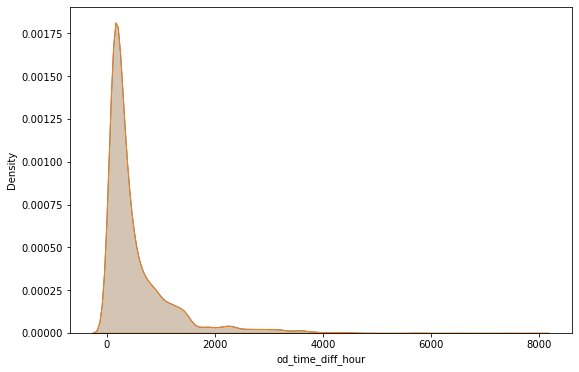

In [95]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['od_time_diff_hour'],fill=True)
sns.kdeplot(df_hp['start_scan_to_end_scan'],fill=True) 

Lower critical value -14.885957829537412
Upper critical value 14.92229072882573
observed_mean_diff 0.8876661698243424


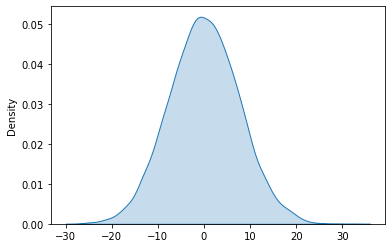

In [98]:
observed_mean_diff=np.mean(df_hp['od_time_diff_hour'])-np.mean(df_hp['start_scan_to_end_scan'])
observed_mean_diff
P=np.concatenate((df_hp['od_time_diff_hour'],df_hp['start_scan_to_end_scan']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

- Observed mean difference within the range of acceptance region, [ LCV, UCV ]So, Null hypothesis is accepted
- This concludes that the aggregated values for 'total trip time' and 'total time taken for product delivery' are approximately close together

# Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [45]:
df_hp[['actual_time', 'osrm_time']]

,actual_time,osrm_time
0,1562.0,743.0
1,143.0,68.0
2,3347.0,1741.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14812,83.0,62.0
14813,21.0,12.0
14814,282.0,54.0
14815,264.0,184.0


#### H0 : Mean of actual_time and osrm_time are same
#### H1 : Mean of actual_time and osrm_time are not the same

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

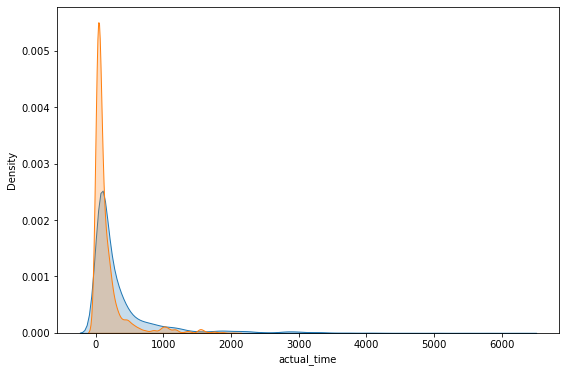

In [104]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['actual_time'],fill=True)
sns.kdeplot(df_hp['osrm_time'],fill=True)

Lower critical value -10.329820106687132
Upper critical value 10.369960000052858
observed_mean_diff 195.07255179860968


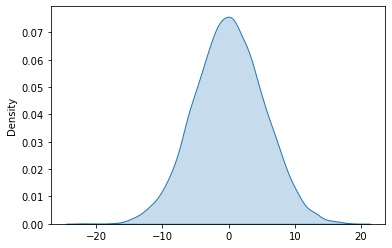

In [46]:
observed_mean_diff=np.mean(df_hp['actual_time'])-np.mean(df_hp['osrm_time'])
observed_mean_diff
P=np.concatenate((df_hp['actual_time'],df_hp['osrm_time']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

- Observed mean difference not within the range of acceptance region, [ LCV, UCV ]. So, Alternate hypothesis is accepted
- This concludes that the aggregated values for 'actual time' and 'estimated time' for product delivery are not close together

# Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [47]:
df_hp[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


#### H0 : Mean of actual_time and segment_actual_time_sum are same
#### H1 : Mean of actual_time and segment_actual_time_sum are not the same

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

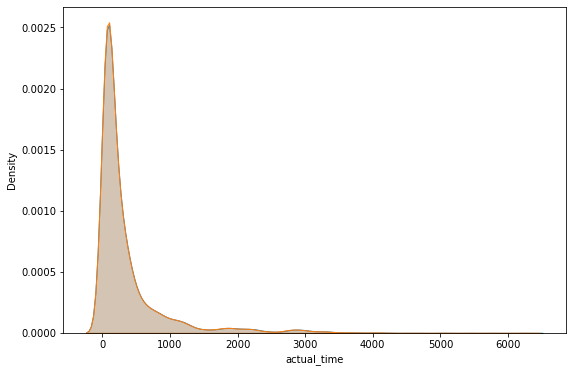

In [106]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['actual_time'],fill=True)
sns.kdeplot(df_hp['segment_actual_time_sum'],fill=True)

Lower critical value -12.920773548879009
Upper critical value 12.704733675760293
observed_mean_diff 3.251467908483505


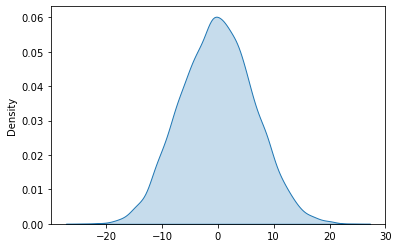

In [48]:
observed_mean_diff=np.mean(df_hp['actual_time'])-np.mean(df_hp['segment_actual_time_sum'])
observed_mean_diff
P=np.concatenate((df_hp['actual_time'],df_hp['segment_actual_time_sum']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

- Observed mean difference within the range of acceptance region, [ LCV, UCV ]. So, Null hypothesis is accepted
- This concludes that the aggregated values for 'actual time' and 'segmented actual time' for product delivery are approximately close together


# Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [49]:
df_hp[['osrm_distance', 'segment_osrm_distance_sum']]

,osrm_distance,segment_osrm_distance_sum
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919
...,...,...
14812,73.4630,64.8551
14813,16.0882,16.0883
14814,58.9037,104.8866
14815,171.1103,223.5324


#### H0 : Mean of osrm_distance and segment_osrm_distance_sum are same
#### H1 : Mean of osrm_distance and segment_osrm_distance_sum are not the same

<AxesSubplot:xlabel='osrm_distance', ylabel='Density'>

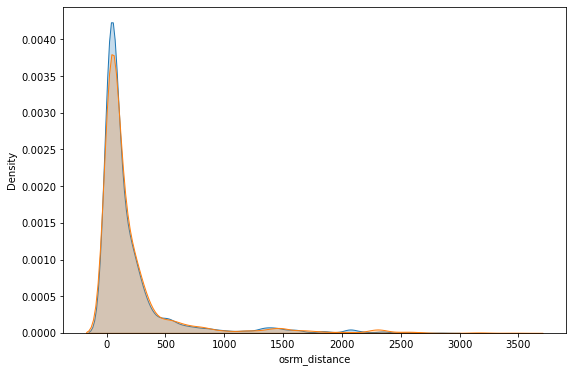

In [107]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['osrm_distance'],fill=True)
sns.kdeplot(df_hp['segment_osrm_distance_sum'],fill=True)

Lower critical value -9.10421361099614
Upper critical value 9.048537546289383
observed_mean_diff -18.856472113113796


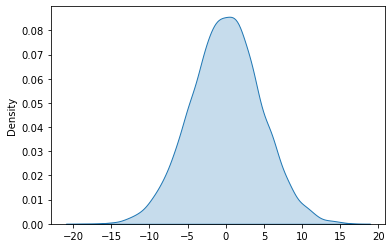

In [50]:
observed_mean_diff=np.mean(df_hp['osrm_distance'])-np.mean(df_hp['segment_osrm_distance_sum'])
observed_mean_diff
P=np.concatenate((df_hp['osrm_distance'],df_hp['segment_osrm_distance_sum']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

- Observed mean difference  not within the range of acceptance region, [ LCV, UCV ]. So, Alternate hypothesis is accepted
- This concludes that the aggregated values for 'estimate distance' and 'segmented estimate distance' for product delivery are not close together


# Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [51]:
df_hp[['osrm_time', 'segment_osrm_time_sum']]

,osrm_time,segment_osrm_time_sum
0,743.0,1008.0
1,68.0,65.0
2,1741.0,1941.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14812,62.0,62.0
14813,12.0,11.0
14814,54.0,88.0
14815,184.0,221.0


#### H0 : Mean of osmr_time_aggregated and segment_osrm_time_aggregated are same
#### H1 : Mean of osmr_time_aggregated and segment_osrm_time_aggregated are not the same


<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

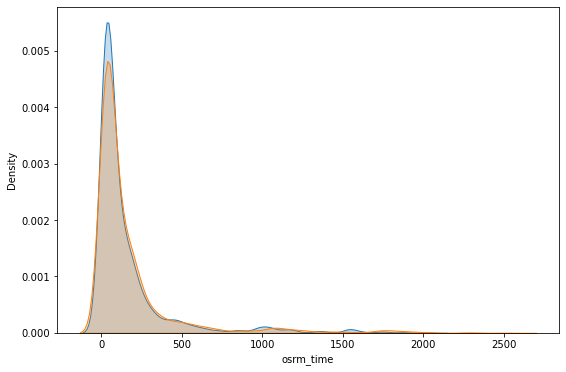

In [108]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['osrm_time'],fill=True)
sns.kdeplot(df_hp['segment_osrm_time_sum'],fill=True)

Lower critical value -6.722013252706098
Upper critical value 6.638574553914168
observed_mean_diff -18.878585408652214


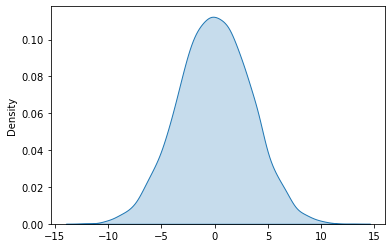

In [112]:
observed_mean_diff=np.mean(df_hp['osrm_time'])-np.mean(df_hp['segment_osrm_time_sum'])
observed_mean_diff
P=np.concatenate((df_hp['osrm_time'],df_hp['segment_osrm_time_sum']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value',lcv)
print('Upper critical value',ucv)
print('observed_mean_diff',observed_mean_diff)

- Observed mean difference not within the range of acceptance region, [ LCV, UCV ]. So, Alternate hypothesis is accepted
- This concludes that the aggregated values for 'estimate time' and 'segmented estimate time' for product delivery are not close together

# Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

In [111]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,df_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,osrm_time_sum,od_time_diff_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0,11.0,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0,31.0,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0,59.0,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0,99.0,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0,143.0,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,12.0,12.0,8.1858,1.000000,trip-153746066843555182IND131028AABIND000000ACB,92.0,65.3487,94.0,230.0,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,26.0,21.0,17.3725,1.238095,trip-153746066843555182IND131028AABIND000000ACB,118.0,82.7212,115.0,306.0,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,20.0,34.0,20.7053,0.588235,trip-153746066843555182IND131028AABIND000000ACB,138.0,103.4265,149.0,394.0,427.686364
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,17.0,27.0,18.8885,0.629630,trip-153746066843555182IND131028AABIND000000ACB,155.0,122.3150,176.0,492.0,427.686364


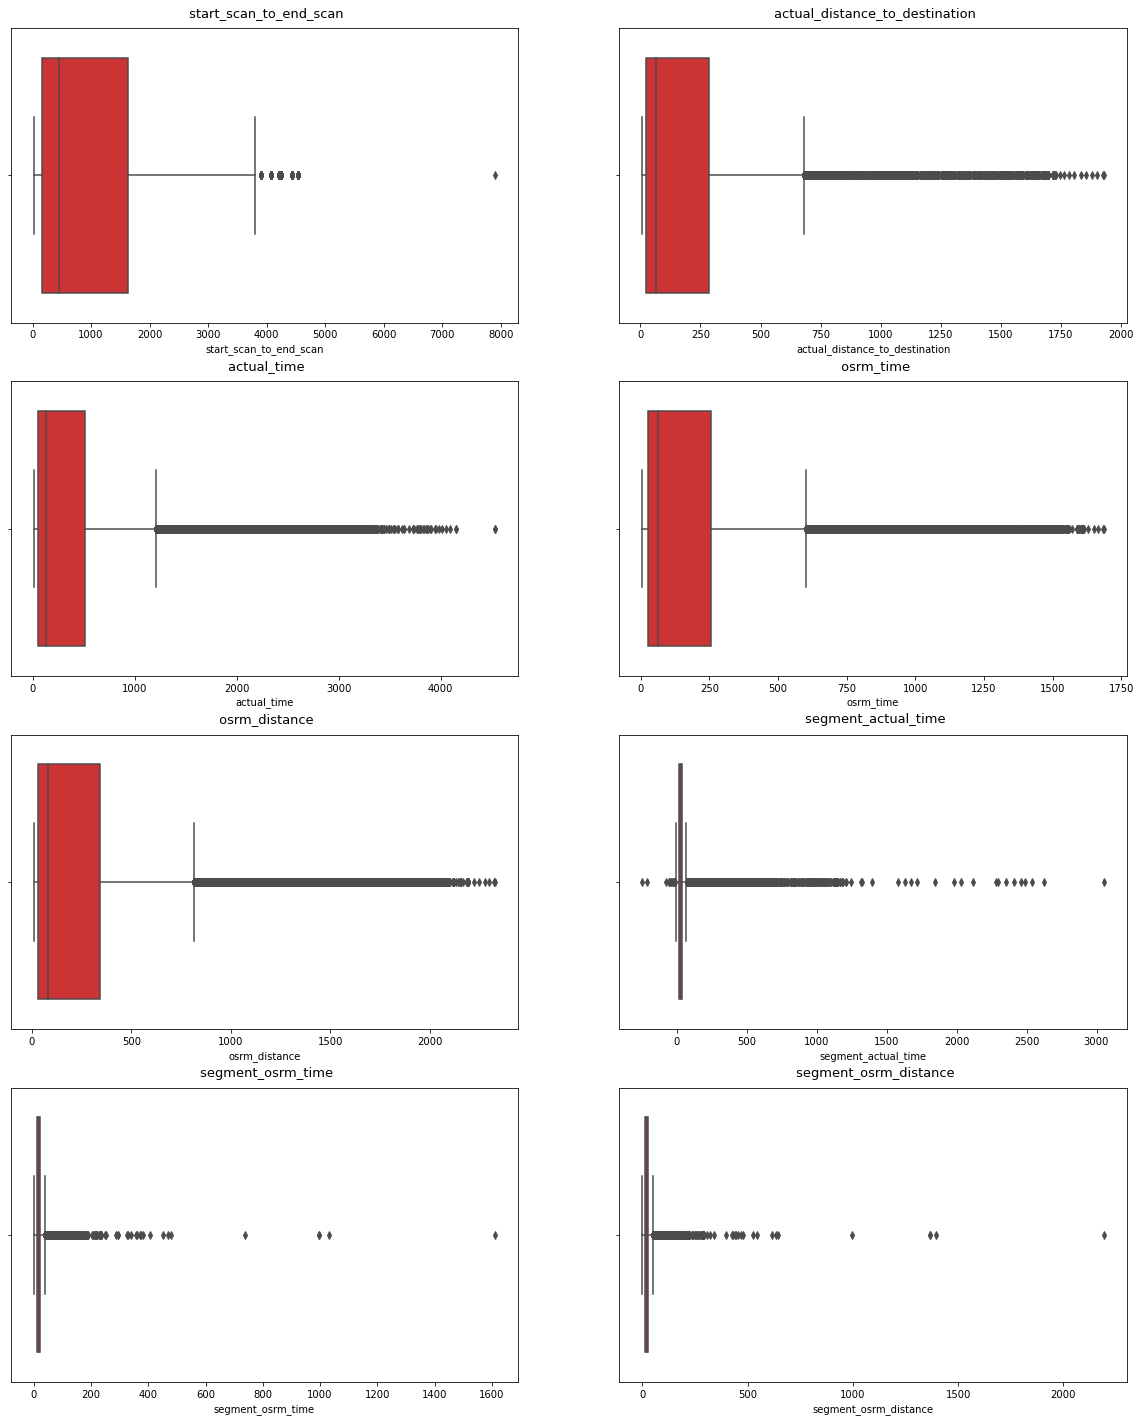

In [53]:
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=df, x=attrs[count], ax=axs[row, col], palette='Set1')
        axs[row,col].set_title(f" {attrs[count]}", pad=12, fontsize=13)
        count +=1
plt.show()

# Handle the outliers using the IQR method.

In [109]:
da=df.copy()
#### Mean and median of attrs values shows large diffrance. So, we need to find outlayer values of purchace
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
       'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in attrs:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('Inter Quartile Range for',i,'=',iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    da=da[~((da[i]<lower)|(da[i]>upper))]
da

Inter Quartile Range for start_scan_to_end_scan = 1473.0
lower limit of start_scan_to_end_scan = -2048.5
upper limit of start_scan_to_end_scan = 3843.5
----------------------------------------------------------------
Inter Quartile Range for actual_distance_to_destination = 263.3530002362333
lower limit of actual_distance_to_destination = -371.6736259929169
upper limit of actual_distance_to_destination = 681.7383749520162
----------------------------------------------------------------
Inter Quartile Range for actual_time = 462.0
lower limit of actual_time = -642.0
upper limit of actual_time = 1206.0
----------------------------------------------------------------
Inter Quartile Range for osrm_time = 230.0
lower limit of osrm_time = -318.0
upper limit of osrm_time = 602.0
----------------------------------------------------------------
Inter Quartile Range for osrm_distance = 313.27855000000005
lower limit of osrm_distance = -440.0031250000001
upper limit of osrm_distance = 813.1110750

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,df_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,osrm_time_sum,od_time_diff_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0,11.0,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0,31.0,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0,59.0,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0,99.0,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0,143.0,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,11.0,12.0,9.5478,0.916667,trip-153746066843555182IND131028AABIND000000ACB,80.0,57.1629,82.0,170.0,427.686364
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,12.0,12.0,8.1858,1.000000,trip-153746066843555182IND131028AABIND000000ACB,92.0,65.3487,94.0,230.0,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,26.0,21.0,17.3725,1.238095,trip-153746066843555182IND131028AABIND000000ACB,118.0,82.7212,115.0,306.0,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,...,20.0,34.0,20.7053,0.588235,trip-153746066843555182IND131028AABIND000000ACB,138.0,103.4265,149.0,394.0,427.686364


- Number of rows have reduced from 1,44,867 to 1,14,085 which proves that several rows containing outliers across different columns of the dataframe are removed successfully


# one-hot encoding of categorical variables

In [55]:
one_hot_encoded_data=pd.get_dummies(df,columns=["route_type"])
one_hot_encoded_data

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,segment_osrm_distance,segment_factor,df_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,osrm_time_sum,od_time_diff_hour,route_type_Carting,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0,11.0,86.213637,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0,31.0,86.213637,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0,59.0,86.213637,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0,99.0,86.213637,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,anand_vunagar_dc (gujarat),IND388620AAB,khambhat_motvddpp_d (gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0,143.0,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,8.1858,1.000000,trip-153746066843555182IND131028AABIND000000ACB,92.0,65.3487,94.0,230.0,427.686364,1,0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,17.3725,1.238095,trip-153746066843555182IND131028AABIND000000ACB,118.0,82.7212,115.0,306.0,427.686364,1,0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,20.7053,0.588235,trip-153746066843555182IND131028AABIND000000ACB,138.0,103.4265,149.0,394.0,427.686364,1,0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,sonipat_kundli_h (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,18.8885,0.629630,trip-153746066843555182IND131028AABIND000000ACB,155.0,122.3150,176.0,492.0,427.686364,1,0


- The route type column containing values 'carting' and 'FTL' are successfully one hot encoded from categorical values to binary numerical values 0 and 1

## Dropping unwanted columns before performing Target encoding

In [56]:
df_new=one_hot_encoded_data.drop(['data','trip_creation_time','source_name','destination_name',
                          'cutoff_timestamp','is_cutoff','cutoff_factor','segment_factor','factor','od_start_time','od_end_time','df_key','segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum','osrm_time_sum'],axis=1)

In [57]:
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,route_type_Carting,route_type_FTL
0,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0
144865,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364,1,0


# Encoding nominal categorical values to numerical values using target encoding


In [58]:
from category_encoders import TargetEncoder
cols=['route_schedule_uuid','trip_uuid','source_center','destination_center']
te = TargetEncoder()
for col in cols:
    df_new[col] = te.fit_transform(df_new[col], df_new['segment_actual_time'])

In [59]:
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,route_type_Carting,route_type_FTL
0,15.016774,30.952799,14.878118,14.878118,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,15.016774,30.952799,14.878118,14.878118,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,15.016774,30.952799,14.878118,14.878118,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,15.016774,30.952799,14.878118,14.878118,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,15.016774,30.952799,14.878118,14.878118,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,26.440080,38.894273,31.677170,35.345313,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,26.440080,38.894273,31.677170,35.345313,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,26.440080,38.894273,31.677170,35.345313,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0
144865,26.440080,38.894273,31.677170,35.345313,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364,1,0


- Successfully performed conversion of categorical values to corresponding numerical values with numbers derived from the target

# Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(df_new)
std_data = pd.DataFrame(std_data, columns=df_new.columns)
std_data

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,route_type_Carting,route_type_FTL
0,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.648246,-0.673677,-0.658642,-0.647814,-0.414331,-0.508094,-0.608251,-0.844299,1.484765,-1.484765
1,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.623604,-0.656958,-0.629422,-0.624640,-0.488998,-0.643449,-0.731779,-0.844299,1.484765,-1.484765
2,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.598385,-0.630207,-0.603449,-0.598958,-0.376997,-0.778805,-0.672644,-0.844299,1.484765,-1.484765
3,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.573802,-0.593424,-0.564489,-0.568034,-0.283663,-0.440416,-0.549064,-0.844299,1.484765,-1.484765
4,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.564329,-0.583392,-0.551502,-0.547479,-0.563666,-0.914160,-1.058963,-0.844299,1.484765,-1.484765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.547308,-0.539921,-0.499556,-0.514923,-0.451665,-0.440416,-0.819862,-0.515013,1.484765,-1.484765
144863,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.521701,-0.496450,-0.447610,-0.472762,-0.190329,0.168683,-0.305506,-0.515013,1.484765,-1.484765
144864,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.486711,-0.463011,-0.408650,-0.445666,-0.302330,1.048494,-0.118905,-0.515013,1.484765,-1.484765
144865,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.464921,-0.432916,-0.376183,-0.412000,-0.358330,0.574750,-0.220626,-0.515013,1.484765,-1.484765


# Data Visualisation

## Correlation of the quantitative data

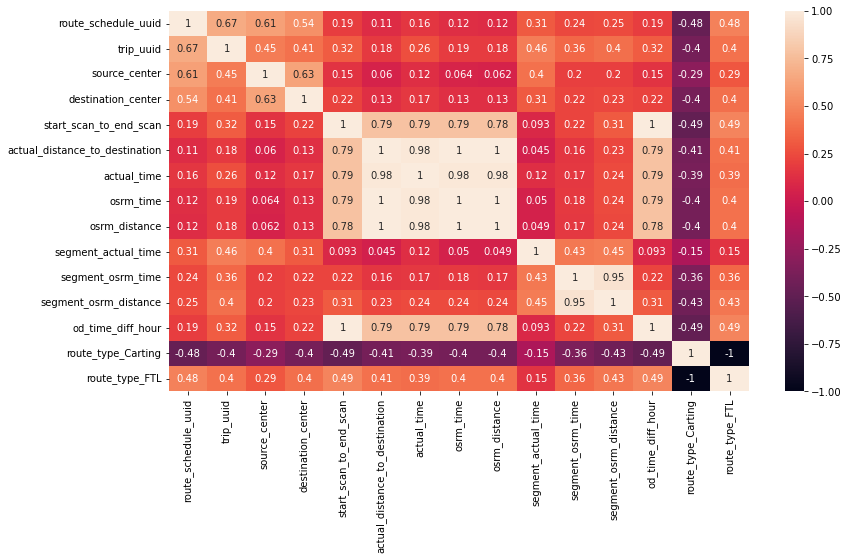

In [62]:
plt.figure(figsize=(13,7))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

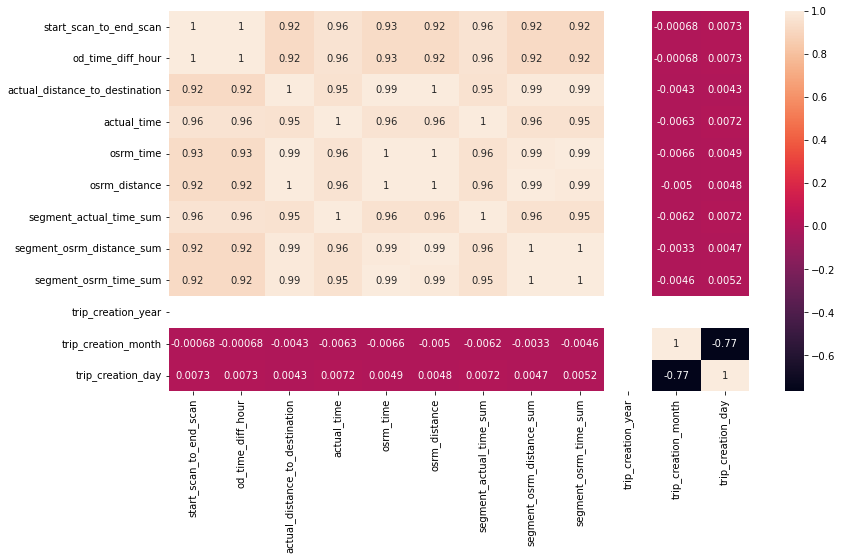

In [63]:
plt.figure(figsize=(13,7))
sns.heatmap(df_hp.corr(), annot=True)
plt.show()

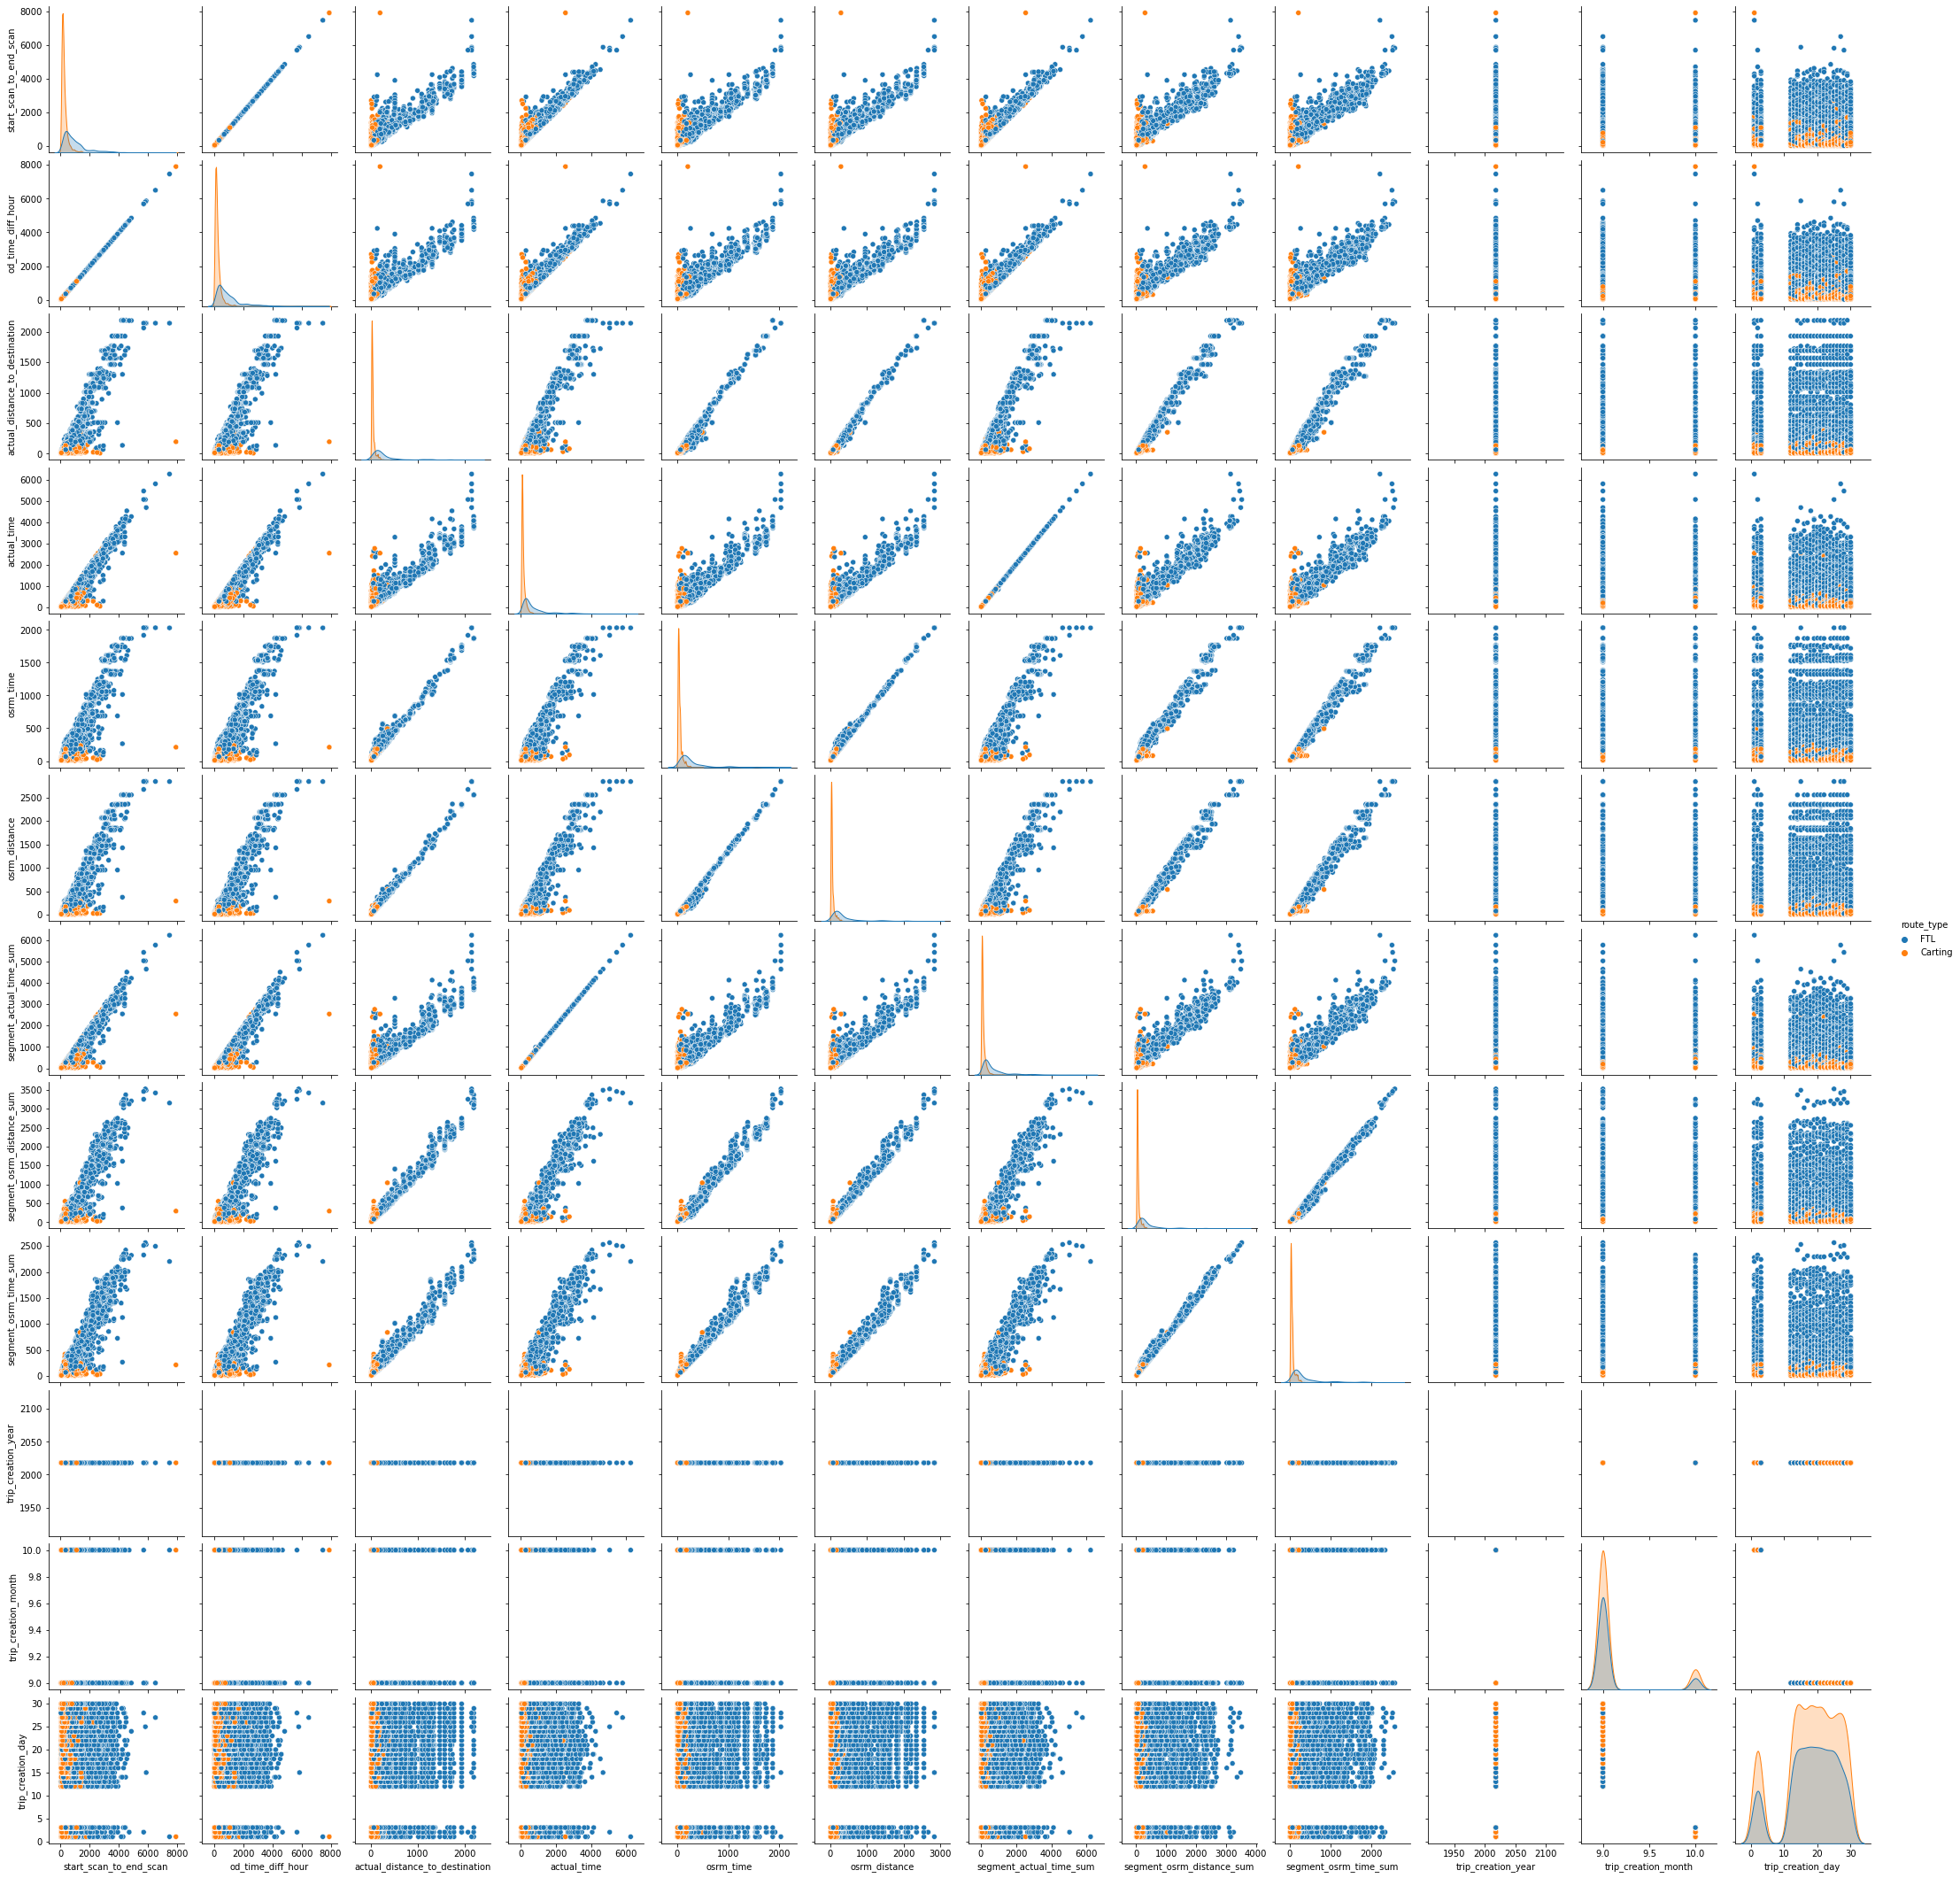

In [122]:
sns.pairplot(data=df_hp, hue='route_type')
plt.show()

# Route type preferance

[]

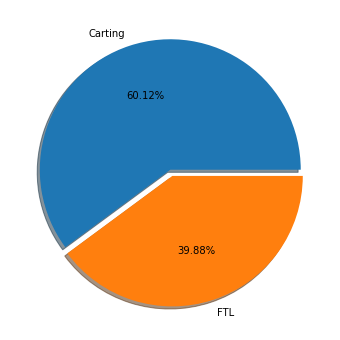

In [119]:
plt.figure(figsize=(9,6))
plt.pie(data=df_hp,x=df_hp['route_type'].value_counts(),shadow=True,labels=['Carting','FTL'],explode=(0,0.05),autopct='%0.2f%%')
plt.plot()

- Most of the products are delivered using carting method
- Around 60 % of the products are delivered via carting while around 40 % followed delivery through FTL

## Average time taken by different route types to deliver products

In [116]:
df_hp.groupby('route_type')['start_scan_to_end_scan'].mean().reset_index()

,route_type,start_scan_to_end_scan
0,Carting,246.537382
1,FTL,959.359790


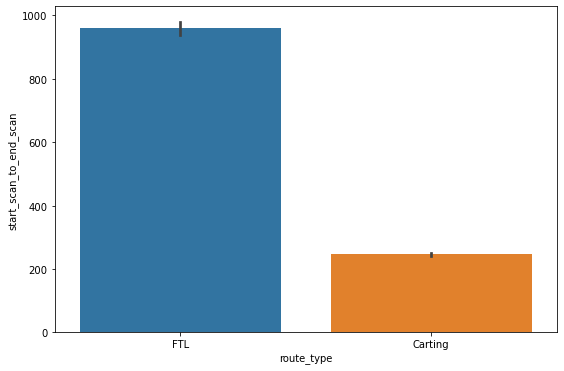

In [120]:
plt.figure(figsize=(9,6))
sns.barplot(data=df_hp, x='route_type', y='start_scan_to_end_scan')
plt.show()

- Average time took for a product to reach the end point is significantly higher for FTL compared to that of carting
- There is high chance that people prefer carting over FTL, because it takes lesser average time to deliver products

## Distribution of the quantitive data

In [173]:
df_hp.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
start_scan_to_end_scan                   float64
od_time_diff_hour                        float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
segment_actual_time_sum                  float64
segment_osrm_distance_sum                float64
segment_osrm_time_sum                    float64
dest_city                                 object
dest_place                                object
dest_state          

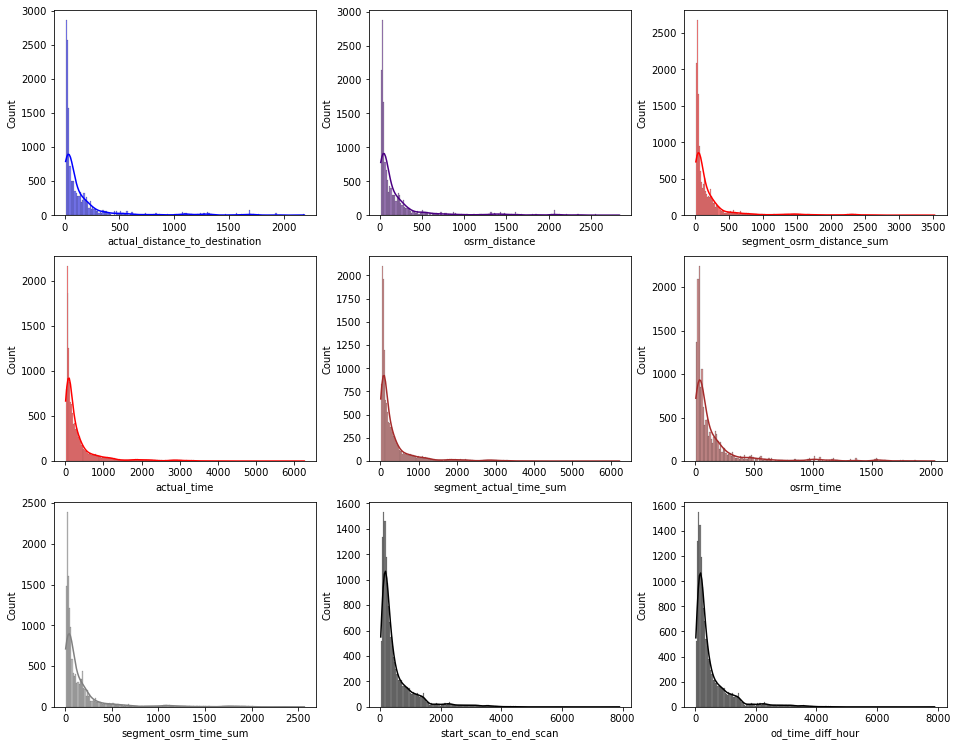

In [177]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(16,9))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df_hp, x="actual_distance_to_destination", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df_hp, x="osrm_distance", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df_hp, x="segment_osrm_distance_sum", kde=True,color="red", ax=axis[0,2])
sns.histplot(data=df_hp, x="actual_time", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df_hp, x="segment_actual_time_sum", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df_hp, x="osrm_time", kde=True,color="brown", ax=axis[1,2])
sns.histplot(data=df_hp, x="segment_osrm_time_sum", kde=True,color="grey", ax=axis[2,0])
sns.histplot(data=df_hp, x="start_scan_to_end_scan", kde=True,color="black", ax=axis[2,1])
sns.histplot(data=df_hp, x="od_time_diff_hour", kde=True,color="black", ax=axis[2,2])
plt.show()


- All plots in the above distribution resembles log normal distribution curve
- Most of the values in actual_distance_to_destination lies in range of 0 - 500
- Most of the values in osrm_distance lies in range of 0 - 700
- Most of the values in segment_osrm_distance_sum lies in range of 0 - 600
- Most of the values in actual_time lies in range of 0 - 1000
- Most of the values in segment_actual_time_sum lies in range of 0 - 1100
- Most of the values in osrm_time lies in range of 0 - 400
- Most of the values in segment_osrm_time_sum lies in range of 0 - 500
- Most of the values in start_scan_to_end_scan lies in range of 0 - 1900
- Most of the values in od_time_diff_hour lies in range of 0 - 1900

## Relation between actual time and estimated time for route types

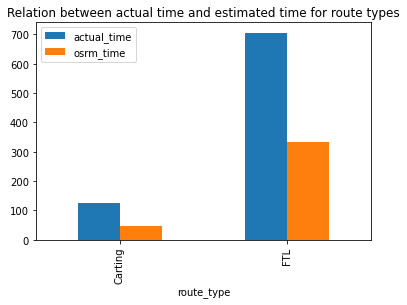

In [130]:
df_hp.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.title('Relation between actual time and estimated time for route types')
plt.show()

- Full truck load route type takes more time to deliver products as its actual and estimated time is significantly higher than that of the carting route type
- Actual time is higher for both carting and FTL route types compared to estimated time


# Relation between actual distance and estimated distance for route types

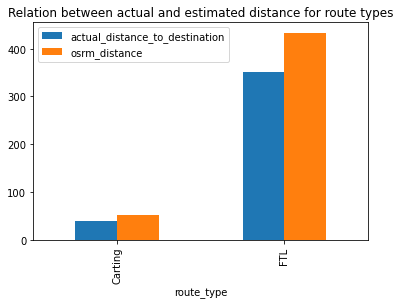

In [131]:
df_hp.groupby('route_type').aggregate({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).plot(kind='bar')
plt.title('Relation between actual and estimated distance for route types')
plt.show()

- Estimated distance is higher for both carting and FTL route types compared to actual distance
- Full truck load route type travels more distance to deliver products than that of the carting route type


# Top Indian states with most source and destination centres

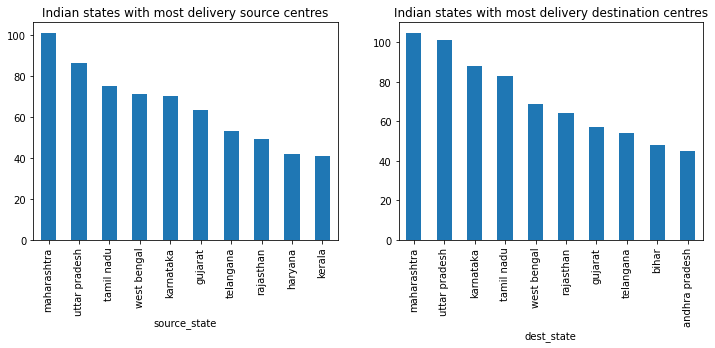

In [132]:
plt.figure(figsize=(12,4))
plt.subplot(121)
top_state = df_hp.groupby('source_state')['source_center'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery source centres')
plt.subplot(122)
df_hp.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery destination centres')
plt.show()

#### Top 5 Indian states with most delivery source centres are :
- Maharashtra
- Uttar Pradesh
- Tamil Nadu
- West Bengal
- Karnataka
#### Top 5 Indian states with most delivery destination centres are :
- Maharashtra
- Uttar Pradesh
- Haryana
- Karnataka
- Tamil Nadu

# Top Indian states with most source and destination cities

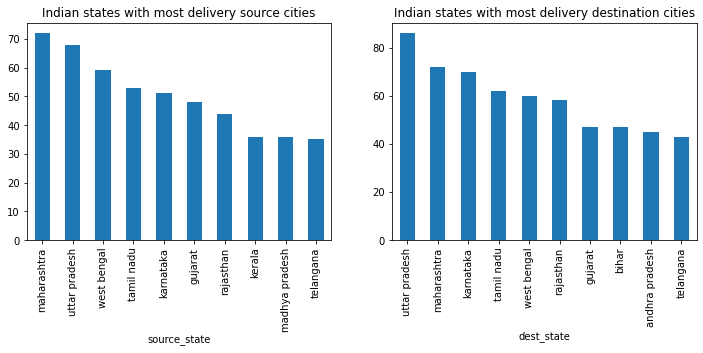

In [133]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df_hp.groupby('source_state')['source_city'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery source cities')
plt.subplot(122)
df_hp.groupby('dest_state')['dest_city'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery destination cities')
plt.show()

#### Top 5 Indian states with most delivery source cities are :
- Maharashtra
- Uttar Pradesh
- West Bengal
- Tamil Nadu
- Karnataka
#### Top 5 Indian states with most delivery destination cities are :
- Maharashtra
- Uttar Pradesh
- West Bengal
- Tamil Nadu
- Karnataka

# Weekday & Month with most delivery of the products

In [153]:
df_hp['month'] = df_hp['trip_creation_time'].dt.month_name()
df_hp['weekday'] = df_hp['trip_creation_time'].dt.day_name()
df_hp

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,dest_place,dest_state,source_city,source_place,source_state,trip_creation_year,trip_creation_month,trip_creation_day,weekday,month
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,central,uttar pradesh,kanpur,central,uttar pradesh,2018,9,12,Wednesday,September
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,chikadpp,karnataka,doddablpur,chikadpp,karnataka,2018,9,12,Wednesday,September
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,bilaspur,haryana,gurgaon,bilaspur,haryana,2018,9,12,Wednesday,September
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,mirard,maharashtra,mumbai hub,None,maharashtra,2018,9,12,Wednesday,September
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,wrdn1dpp,karnataka,bellary,dc,karnataka,2018,9,12,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,mehmdpur,punjab,chandigarh,mehmdpur,punjab,2018,10,3,Wednesday,October
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,blbgarh,haryana,fbd,balabhgarh,haryana,2018,10,3,Wednesday,October
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,govndngr,uttar pradesh,kanpur,govndngr,uttar pradesh,2018,10,3,Wednesday,October
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,shnmgprm,tamil nadu,tirunelveli,vdkkusrt,tamil nadu,2018,10,3,Wednesday,October


In [147]:
x=df_hp['month'].value_counts().to_frame('count').reset_index()
x

,index,count
0,September,13029
1,October,1788


In [154]:
y=df_hp['weekday'].value_counts().to_frame('count').reset_index()
y

,index,count
0,Wednesday,2739
1,Saturday,2130
2,Thursday,2106
3,Friday,2060
4,Tuesday,2040
5,Monday,1987
6,Sunday,1755


[]

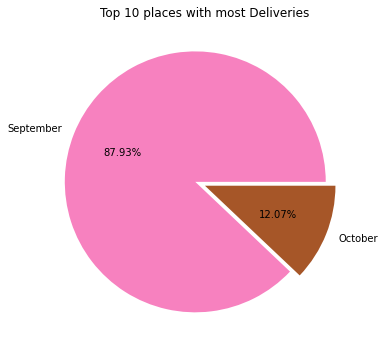

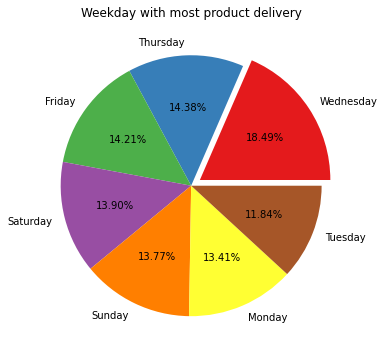

In [157]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set1_r')
plt.pie(data=x, x=x['count'], colors=palette_color, labels=['September', 'October'], explode=(0.08,0), autopct='%0.2f%%')
plt.title('Top 10 places with most Deliveries')
plt.plot()

plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set1')
plt.pie(data=y, x=y['count'], colors=palette_color, labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
plt.title('Weekday with most product delivery')
plt.plot()

- The given data for product delivery is over the period of two months, september and october
- Majority of the product delivery is done across the month of september
- Most number of products are delivered on wednesday, followed by saturday and then thursday
- Least number of produscts are delivered on sunday


# Relation between actual time and estimated time for the completion of product delivery

In [158]:
x1=df_hp.groupby('source_state').aggregate({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1


,source_state,variable,value
0,andhra pradesh,actual_time,398.435484
1,arunachal pradesh,actual_time,429.250000
2,assam,actual_time,540.171642
3,bihar,actual_time,492.645714
4,chandigarh,actual_time,168.741935
5,chhattisgarh,actual_time,174.139535
6,dadra and nagar haveli,actual_time,48.333333
7,delhi,actual_time,230.550824
8,goa,actual_time,540.138462
9,gujarat,actual_time,331.470667


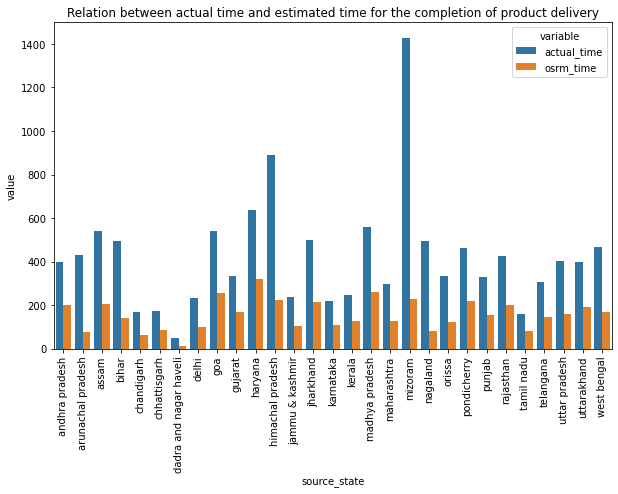

In [159]:
plt.figure(figsize=(10,6))
sns.barplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between actual time and estimated time for the completion of product delivery')
plt.xticks(rotation=90)
plt.show()

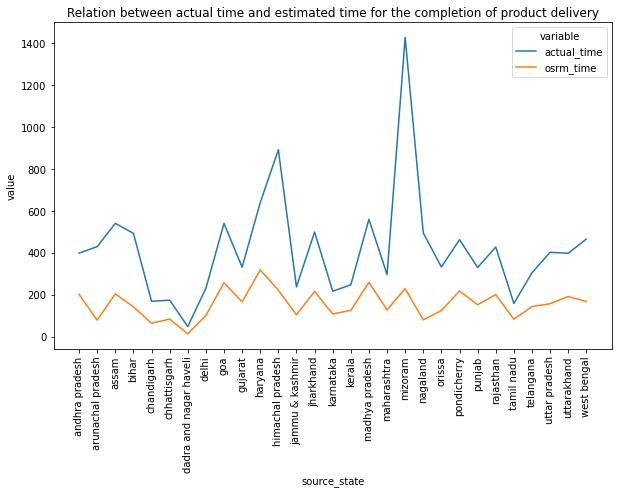

In [160]:
plt.figure(figsize=(10,6))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between actual time and estimated time for the completion of product delivery')
plt.xticks(rotation=90)
plt.show()


- Value for Actual time is always higher than that of the estimated time for product delivery
- Actual and estimated time difference for product delivery in places like Dadra & Nagar Haveli, Tamil Nadu and Karnataka are very low
- Actual and estimated time difference for product delivery in places like Mizoram, Himachal Paradesh and Goa are very high


## Relation between actual distance and estimated distance for product delivery

In [169]:
x1=df_hp.groupby('source_state').aggregate({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
x1


,source_state,variable,value
0,andhra pradesh,actual_distance_to_destination,204.851280
1,arunachal pradesh,actual_distance_to_destination,76.500104
2,assam,actual_distance_to_destination,192.417256
3,bihar,actual_distance_to_destination,153.478961
4,chandigarh,actual_distance_to_destination,54.782736
5,chhattisgarh,actual_distance_to_destination,73.734984
6,dadra and nagar haveli,actual_distance_to_destination,14.349976
7,delhi,actual_distance_to_destination,99.991424
8,goa,actual_distance_to_destination,218.947471
9,gujarat,actual_distance_to_destination,175.422762


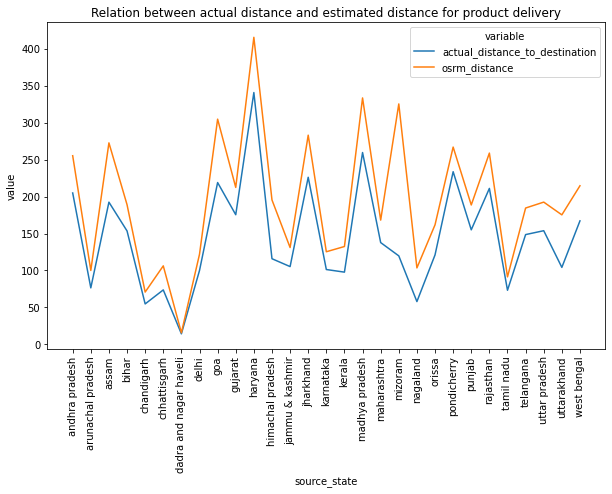

In [170]:
plt.figure(figsize=(10,6))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between actual distance and estimated distance for product delivery')
plt.xticks(rotation=90)
plt.show()

- Value for Actual distance is always higher than that of the estimated distance for product delivery
- Actual and estimated distance for product delivery differ the least in places like Dadra & Nagar Haveli and Tamil Nadu
- Actual and estimated distance for product delivery differ the most in places like Mizoram and Goa

## Destination states and destination cities with the highest product delivery

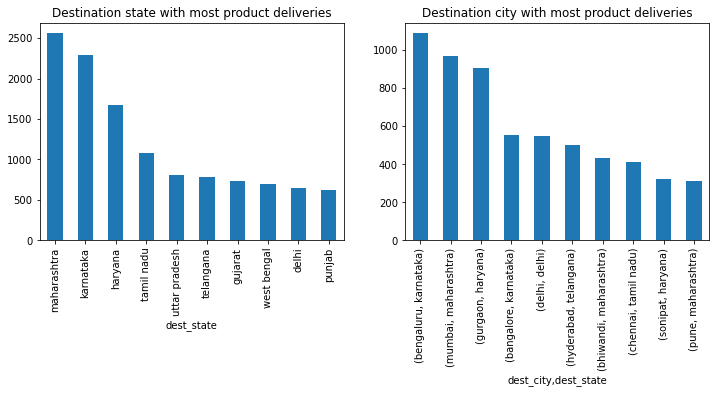

In [167]:
plt.figure(figsize=(12,4))
plt.subplot(121)
df_hp.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
#sns.barplot(data=d_state, x='dest_state', y='trip_uuid', palette='Blues_r')
plt.title('Destination state with most product deliveries')
plt.xticks(rotation=90)
plt.subplot(122)
df_hp.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Destination city with most product deliveries')
plt.show()

#### Top 5 Indian states with most product delivery sources are :
- Maharashtra
- Karnataka
- Haryana
- Tamil Nadu and
- Telangana
#### The cities with most source centres are :
- Gurgaon
- Bangalore
- Bhiwandi
- Mumbai and
- Delhi

## Variation of product delivery across the given months


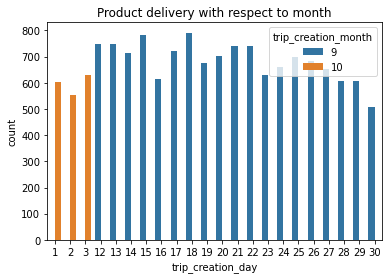

In [168]:
sns.countplot(data=df_hp,x='trip_creation_day',hue='trip_creation_month')
plt.title('Product delivery with respect to month')
plt.show()


- From the given data for two months, eventhough the variation is small, we can observe that the amount of delivery tends to rise towards the middle of the month

# Recommendations
- FTL shipments Full Truck Load takes more time to deliver product than carting shipments so for faster delivery of the products, carting route is more preferable.
- Delhivery should find an alternative mathod to improve  FTL time consumption. 
- Maharashtra,Karnataka and Haryana are the states having most number of deliveries.So Delhivery should focus on these state to improve their business.
- Mizoram,Tripura and Nagaland are the states with the least number of deliveries.So Delhivery should find an alternative to improve their bussiness here.
- We observed that the actual time is higher than the osrm time in every states.So we must focus more on equalizing the time.
- In state like Mizoram actual time very high than osrm.So we should find a way to minimize this variation in actual time.
- According to the findings wednesday have delivered more number of orders.So we should focus on increase the delivery rate of other weekdays as much as the rate in wednesday. 
- In the north-east states in India have less destination centers.So for the future enhancement of business we should bring them close to our business circle.